- **데이콘 베이직 : 펭귄 몸무게 예측 경진대회**

- 목적: 펭귄의 종류, 날개 길이, 부리 깊이 등 펭귄들의 정보를 담은 데이터를 통해 각 펭귄의 몸무게를 예측

- 평가: RMSE(Root Mean Square Error)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnigs
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data set 확인

In [2]:
df_train = pd.read_csv('C:/Users/HyungWook/Dacon/penguin/train.csv')
df_test = pd.read_csv('C:/Users/HyungWook/Dacon/penguin/test.csv')

In [3]:
df_train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [4]:
df_train.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,56.500000,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,33.052988,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,28.250000,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,56.500000,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,84.750000,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [5]:
df_test.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,228.00000,228.000000,228.000000,228.000000,219.000000,220.000000
mean,113.50000,43.576316,17.219298,199.846491,8.731226,-25.667745
std,65.96211,5.506157,1.992027,13.663938,0.544827,0.759964
min,0.00000,32.100000,13.100000,172.000000,7.685280,-26.864850
25%,56.75000,38.900000,15.700000,189.750000,8.325385,-26.236812
50%,113.50000,43.250000,17.500000,196.000000,8.675380,-25.806100
75%,170.25000,48.100000,18.700000,212.000000,9.109330,-25.115125
max,227.00000,59.600000,21.500000,230.000000,10.023720,-23.787670


- ## Null data check

In [6]:
for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 
* (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column :         id	 Percent of NaN value: 0.00%
column :    Species	 Percent of NaN value: 0.00%
column :     Island	 Percent of NaN value: 0.00%
column : Clutch Completion	 Percent of NaN value: 0.00%
column : Culmen Length (mm)	 Percent of NaN value: 0.00%
column : Culmen Depth (mm)	 Percent of NaN value: 0.00%
column : Flipper Length (mm)	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 2.63%
column : Delta 15 N (o/oo)	 Percent of NaN value: 2.63%
column : Delta 13 C (o/oo)	 Percent of NaN value: 2.63%
column : Body Mass (g)	 Percent of NaN value: 0.00%


In [7]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 
* (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column :         id	 Percent of NaN value: 0.00%
column :    Species	 Percent of NaN value: 0.00%
column :     Island	 Percent of NaN value: 0.00%
column : Clutch Completion	 Percent of NaN value: 0.00%
column : Culmen Length (mm)	 Percent of NaN value: 0.00%
column : Culmen Depth (mm)	 Percent of NaN value: 0.00%
column : Flipper Length (mm)	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 2.63%
column : Delta 15 N (o/oo)	 Percent of NaN value: 3.95%
column : Delta 13 C (o/oo)	 Percent of NaN value: 3.51%


- train, test, 동일하게 Sex, Delta 15 N, Delta 13 C 에서 Null값이 있는것을 확인할 수 있습니다.

# EDA(Exploratory Data Analysis)

## Island(샘플들이 수집된 Palmer Station 근처 섬 이름)

In [22]:
df_train[['Island', 'Body Mass (g)']].groupby(['Island'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Island,
Biscoe,4878.947368
Torgersen,3817.307692
Dream,3764.772727


- Biscoe섬의 펭귄 평균몸무게가 가장 높은걸 확인할수 있다. 섬마다 몸무게 차이가 있음을 알 수 있으며 나중에 모델을 세울때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있다.

## Species: 펭귄의 종을 나타내는 문자열

In [21]:
df_train[['Species', 'Body Mass (g)']].groupby(['Species'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Species,
Gentoo penguin (Pygoscelis papua),5075.520833
Adelie Penguin (Pygoscelis adeliae),3801.219512
Chinstrap penguin (Pygoscelis antarctica),3756.000000


- Island와 마찬가지로 , Species도 예측 모델에 쓰일 중요한 feature임을 알수 있습니다.

## Clutch Completion(관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기)

In [23]:
df_train[['Clutch Completion', 'Body Mass (g)']].groupby(['Clutch Completion'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Clutch Completion,
Yes,4352.696078
No,4116.666667


- 조금의 차이는 있지만, 좀 비슷한것 같습니다. 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.

## Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이

In [24]:
df_train[['Culmen Length (mm)', 'Body Mass (g)']].groupby(['Culmen Length (mm)'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Culmen Length (mm),
55.1,5850.0
48.6,5800.0
54.3,5650.0
51.1,5625.0
52.1,5550.0
...,...
38.8,3275.0
51.5,3250.0
37.7,3075.0


<AxesSubplot:xlabel='Culmen Length (mm)'>

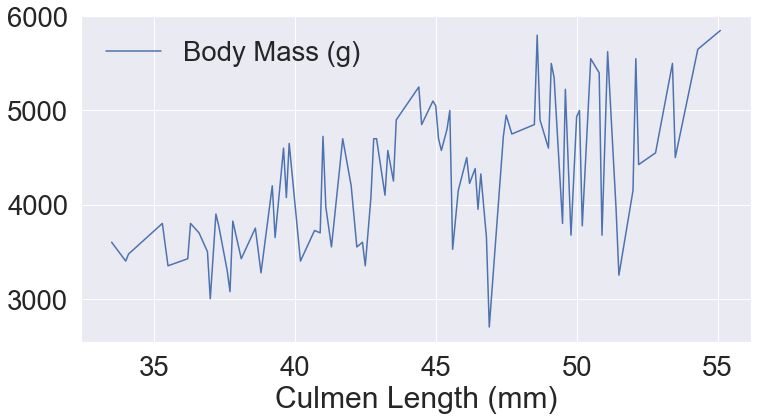

In [41]:
df_train[['Culmen Length (mm)', 'Body Mass (g)']].groupby(['Culmen Length (mm)'], as_index=True).mean().plot(figsize=(12,6))

- 부리의 가로 길이가 길수록 뚜렷하게 몸무게가 증가한다고 말할 수는 없지만, 어느정도 증가하는 경향을 가지고 있으므로 변수로 사용하는것이 좋을것 같습니다.

## Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이

In [25]:
df_train[['Culmen Depth (mm)', 'Body Mass (g)']].groupby(['Culmen Depth (mm)'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Culmen Depth (mm),
16.3,6000.000000
15.3,5550.000000
15.8,5500.000000
15.2,5475.000000
15.9,5450.000000
15.7,5400.000000
14.8,5200.000000
16.0,5106.250000
13.3,5100.000000


<AxesSubplot:xlabel='Culmen Depth (mm)'>

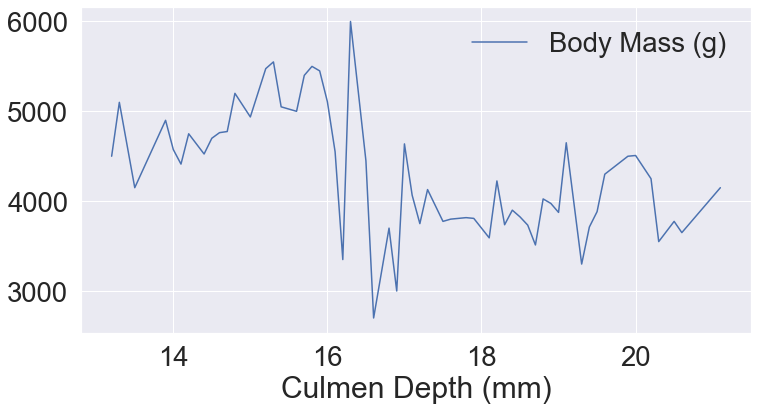

In [42]:
df_train[['Culmen Depth (mm)', 'Body Mass (g)']].groupby(['Culmen Depth (mm)'], as_index=True).mean().plot(figsize=(12,6))

- 부리의 세로 길이는 뚜렷한 선형의 관계를 가지고 있지 않다.

## Flipper Length (mm) : 펭귄의 팔(날개) 길이

In [46]:
df_train[['Flipper Length (mm)', 'Body Mass (g)']].groupby(['Flipper Length (mm)'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Flipper Length (mm),
230,5733.333333
231,5650.000000
221,5650.000000
222,5550.000000
228,5500.000000
224,5350.000000
225,5316.666667
220,5260.000000
226,5200.000000


<AxesSubplot:xlabel='Flipper Length (mm)'>

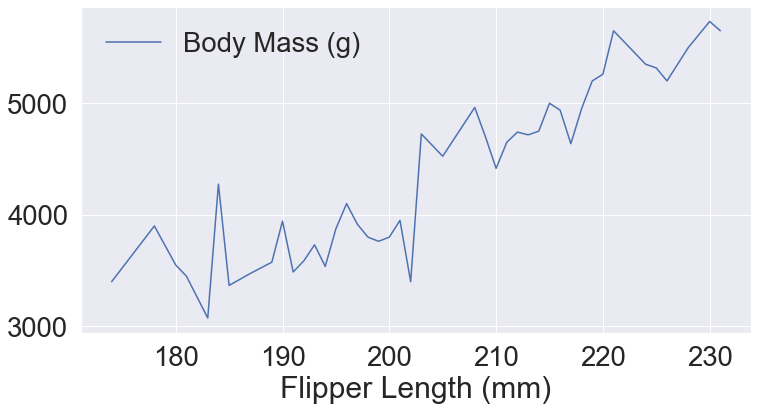

In [47]:
df_train[['Flipper Length (mm)', 'Body Mass (g)']].groupby(['Flipper Length (mm)'], as_index=True).mean().plot(figsize=(12,6))

- 팔(날개) 길이 뚜렷한 양의 상관관계를 가지고 있는듯합니다. 모델을 돌릴 때 중요한 변수로 생각해야 할 것 같습니다.

## Sex : 펭귄의 성별

In [48]:
df_train[['Sex', 'Body Mass (g)']].groupby(['Sex'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Sex,
MALE,4659.821429
FEMALE,4000.909091


- 성별간의 몸무게 차이도 존재하는 것으롱 보입니다.

## Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율

In [49]:
df_train[['Delta 15 N (o/oo)', 'Body Mass (g)']].groupby(['Delta 15 N (o/oo)'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Delta 15 N (o/oo),
8.27376,6300
8.40327,6000
8.08354,5850
8.59640,5800
8.38324,5700
...,...
8.88098,3275
9.68950,3250
9.21510,3075


<AxesSubplot:xlabel='Delta 15 N (o/oo)'>

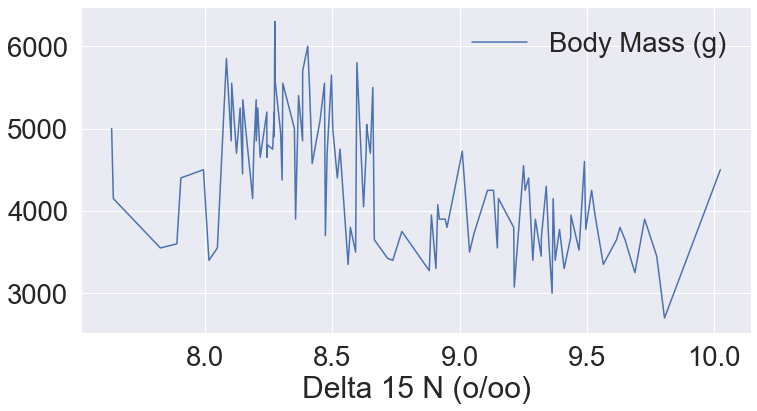

In [50]:
df_train[['Delta 15 N (o/oo)', 'Body Mass (g)']].groupby(['Delta 15 N (o/oo)'], as_index=True).mean().plot(figsize=(12, 6))

## Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율

In [51]:
df_train[['Delta 13 C (o/oo)', 'Body Mass (g)']].groupby(['Delta 13 C (o/oo)'], as_index=True).mean().sort_values(by='Body Mass (g)', ascending=False)

,Body Mass (g)
Delta 13 C (o/oo),
-25.00169,6300
-26.76821,6000
-26.18161,5850
-26.71199,5800
-26.84272,5700
...,...
-25.89741,3275
-24.43062,3250
-26.22530,3075


<AxesSubplot:xlabel='Delta 13 C (o/oo)'>

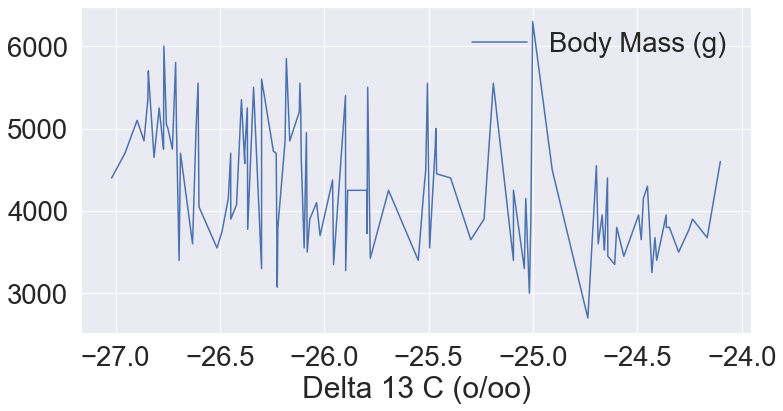

In [52]:
df_train[['Delta 13 C (o/oo)', 'Body Mass (g)']].groupby(['Delta 13 C (o/oo)'], as_index=True).mean().plot(figsize=(12,6))

- 토양과 먹이에 따라 변화하는 안정 동위원소 비율 모두 별다른 특징을 가지고 있지 않는것으로 보입니다.

# Feature engineering